## Dataset Information

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica

# Import Modules

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [25]:
df = pd.read_csv('iris.csv')

In [26]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Preprocessing the dataset

In [30]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Exploratory Data Analysis

<AxesSubplot:>

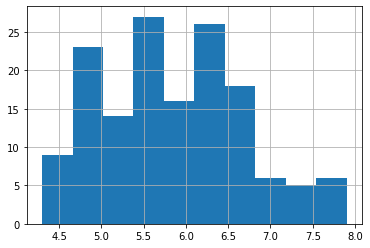

In [31]:
#histograms
df['SepalLengthCm'].hist()

<AxesSubplot:>

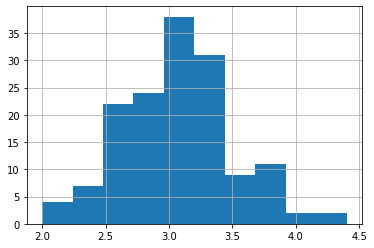

In [32]:
df['SepalWidthCm'].hist()

<AxesSubplot:>

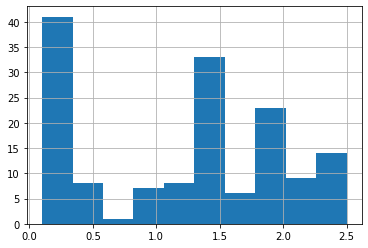

In [33]:
df['PetalWidthCm'].hist()

<AxesSubplot:>

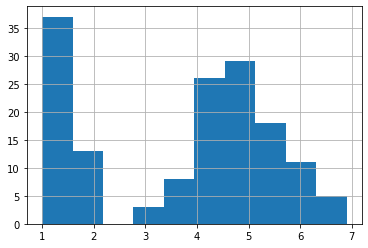

In [34]:
df['PetalLengthCm'].hist()

In [35]:
#scatterplot
colors = ['red', 'yellow', 'blue']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

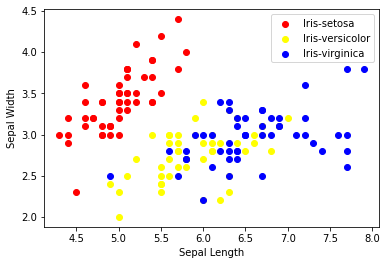

In [36]:
for i in range(3):
    x = df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

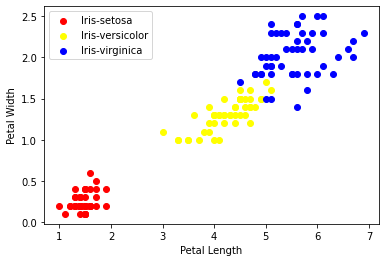

In [37]:
for i in range(3):
    x = df[df['Species']==species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

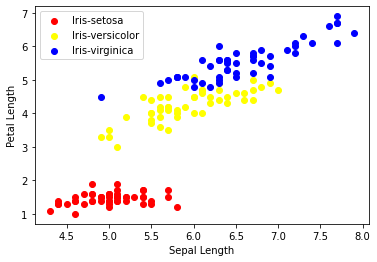

In [38]:
for i in range(3):
    x = df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c=colors[i], label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()

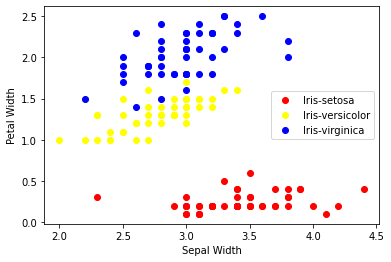

In [39]:
for i in range(3):
    x = df[df['Species']==species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.legend()

# Correlation Matrix

In [40]:
corr = df.corr()
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

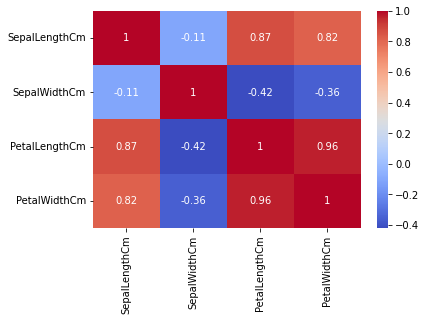

In [41]:
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Label Encoding

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [43]:
df['Species'] = le.fit_transform(df['Species'])

In [44]:
df['Species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

# Model Training

In [45]:
from sklearn.model_selection import train_test_split
x = df.drop('Species', axis=1)
y = df['Species']

In [46]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3)

In [47]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [48]:
model.fit(xtrain, ytrain)

LogisticRegression()

In [49]:
preds = model.predict(xtest)

In [50]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(preds, ytest))
print(confusion_matrix(preds, ytest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.92      0.86      0.89        14
           2       0.88      0.94      0.91        16

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

[[15  0  0]
 [ 0 12  2]
 [ 0  1 15]]


In [52]:
print(model.score(xtest, ytest)*100)

93.33333333333333


In [53]:
#KNN - K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [54]:
model.fit(xtrain, ytrain)

KNeighborsClassifier()

In [55]:
preds = model.predict(xtest)

In [56]:
print(confusion_matrix(ytest, preds))
print(classification_report(ytest, preds))

[[15  0  0]
 [ 0 12  1]
 [ 0  1 16]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.92      0.92      0.92        13
           2       0.94      0.94      0.94        17

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [57]:
print('Accuracy: ', model.score(xtest, ytest)*100)

Accuracy:  95.55555555555556


In [59]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [60]:
model.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [61]:
preds = model.predict(xtest)

In [62]:
print(confusion_matrix(ytest, preds))
print(classification_report(ytest, preds))

[[15  0  0]
 [ 0 12  1]
 [ 0  2 15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.86      0.92      0.89        13
           2       0.94      0.88      0.91        17

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45



In [63]:
print('Accuracy: ', model.score(xtest, ytest)*100)

Accuracy:  93.33333333333333


# END OF NOTEBOOK